# <center>Welcome to Supervised Learning</center>
## <center>Part 4: Non-linear supervised machine learning algorithms</center>
## <center>Instructor: Andras Zsom</center>
### <center>https://github.com/azsom/Supervised-Learning<center>

## The topic of the course series: supervised Machine Learning (ML)
- how to build an ML pipeline from beginning to deployment
- we assume you already performed data cleaning
- this is the fourth course out of 6 courses
    - Part 1: Introduction to machine learning and the bias-variance tradeoff
    - Part 2: How to prepare your data for supervised machine learning**
    - Part 3: Evaluation metrics in supervised machine learning
    - **Part 4: Non-linear supervised machine learning algorithms**
    - Part 5: Missing data in supervised ML
    - Part 6: Interpretability
- you can complete the courses in sequence or complete individual courses based on your interest

### Structured data
| X|feature_1|feature_2|...|feature_j|...|feature_m|<font color='red'>Y</font>|
|-|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|__data_point_1__|x_11|x_12|...|x_1j|...|x_1m|__<font color='red'>y_1</font>__|
|__data_point_2__|x_21|x_22|...|x_2j|...|x_2m|__<font color='red'>y_2</font>__|
|__...__|...|...|...|...|...|...|__<font color='red'>...</font>__|
|__data_point_i__|x_i1|x_i2|...|x_ij|...|x_im|__<font color='red'>y_i</font>__|
|__...__|...|...|...|...|...|...|__<font color='red'>...</font>__|
|__data_point_n__|x_n1|x_n2|...|x_nj|...|x_nm|__<font color='red'>y_n</font>__|


### Learning objectives of this course

By the end of the course, you will be able to
- Summarize how each algorithm works (KNN, SVM, RF, XGBoost)
- Describe which hyperparameters need to be tuned and what range the values should have
- Apply the algorithms in regression and classification
- Visualize the predictions of toy datasets
- Summarize under what circumstances a certain algorithm is expected to perform well or poorly and why


## Which ML algorithm to try on your dataset?

- there is no algo that performs well under all conditions!
- try as many as you can ato figure out which one performs best on your dataset
- always start with linear or logistic regression - check out the first course in the course series!
- then try as many other ML lagorithms as you can
- only exclude an ML algorithm if you have a very good reason to believe it wouldn't work well!
- but you might be able to exclude some algos in advance
   - large dataset (>1e6 points)
   - more features than points
- other than predictive power, what else is important for you?
   - how the model behaves with respect to outliers?
   - does the prediction varies smoothly with the feature values?
   - can the model capture non-linear dependencies?
   - is the model easy to interpret for a human?

# Module 1: K-Nearest Neighbors
### Learning objectives of this module:
- Summarize how KNN works
- Describe which hyperparameters need to be tuned and what range the values should have
- Apply the algorithms in regression and classification
- Visualize the predictions of toy datasets
- Summarize under what circumstances a certain algorithm is expected to perform well or poorly and why

## KNNs
- instance-based learning
- the feature values of a point is treated as a coordinate in an $m$ dimensional space ($m$ is the number of features)
- a distance metric (like euclidian or manhattan) is used to determine how far each point in the training set is from the point we want to predict
- collect the target variabe of k nearest points in the training set
- in classification: the predicted class is determined by the majority vote of target variable, the predicted probability is determined by the class ratios in the target variable
- in regression: the prediction is the mean of the target variable


## KNN hyperparameters to tune
- read through the manual for detailed info
- n_neighbors: the number of neighbors to use
    - extreme cases:
        - n_neighbors = 1, the prediction is based on the nearest point only, this means 0 or 100% predicted probabilities in classification and a perfect score on the training set
        - n_neighbors = n (where n is the number of points in the training set), all points contribute to the prediction, usually not desired because it generates a high bias model
    - I recommend exploring values like [1, 3, 10, 30, 100, ...] the max value should be near n
- weights: 'uniform' or 'distance'
    - uniform: all nearest neighbors contribute equally to the prediction
    - distance: neighbors closer to the point contribute with a larger weight
- metric: the distance metric to use
    - minkowski with p = 1 is the manhattan distance and p = 2 is the euclidian distance  
    - see [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric) for a complete list

## KNN regression

In [1]:
# let's create a simple toy dataset

import numpy as np
np.random.seed(10)
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

n_samples = 30

X = np.random.rand(n_samples)
y = true_fun(X) + np.random.randn(n_samples) * 0.1

X_new = np.linspace(-0.5, 1.5, 2000)

In [2]:
from sklearn.neighbors import KNeighborsRegressor
help(KNeighborsRegressor)

Help on class KNeighborsRegressor in module sklearn.neighbors._regression:

class KNeighborsRegressor(sklearn.neighbors._base.NeighborsBase, sklearn.neighbors._base.KNeighborsMixin, sklearn.neighbors._base.SupervisedFloatMixin, sklearn.base.RegressorMixin)
 |  KNeighborsRegressor(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
 |  
 |  Regression based on k-nearest neighbors.
 |  
 |  The target is predicted by local interpolation of the targets
 |  associated of the nearest neighbors in the training set.
 |  
 |  Read more in the :ref:`User Guide <regression>`.
 |  
 |  .. versionadded:: 0.9
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : un

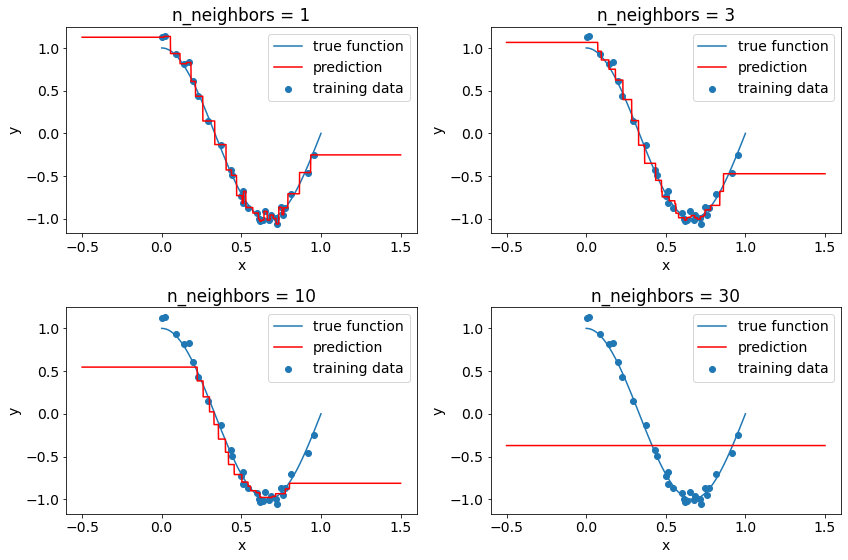

In [3]:
# let's train a couple of KNNs with various n_neighbors and uniform weight
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 14})


plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.scatter(X,y,label='training data')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
reg = KNeighborsRegressor(n_neighbors=1,weights='uniform')
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])
plt.plot(X_new,y_new,'r',label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('n_neighbors = 1')
plt.legend()

plt.subplot(2,2,2)
plt.scatter(X,y,label='training data')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
reg = KNeighborsRegressor(n_neighbors=3,weights='uniform')
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])
plt.plot(X_new,y_new,'r',label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('n_neighbors = 3')
plt.legend()

plt.subplot(2,2,3)
plt.scatter(X,y,label='training data')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
reg = KNeighborsRegressor(n_neighbors=10,weights='uniform')
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])
plt.plot(X_new,y_new,'r',label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('n_neighbors = 10')
plt.legend()


plt.subplot(2,2,4)
plt.scatter(X,y,label='training data')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
reg = KNeighborsRegressor(n_neighbors=30,weights='uniform')
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])
plt.plot(X_new,y_new,'r',label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('n_neighbors = 30')
plt.legend()

plt.tight_layout()
plt.savefig('figures/kneighbors_uni_reg.png',dpi=300)
plt.show()


## KNN in classification

In [4]:
# let's create a toy dataset with two features
from sklearn.datasets import make_moons

# create the data
X,y = make_moons(noise=0.2, random_state=1,n_samples=200)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.NeighborsBase, sklearn.neighbors._base.KNeighborsMixin, sklearn.neighbors._base.SupervisedIntegerMixin, sklearn.base.ClassifierMixin)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of t

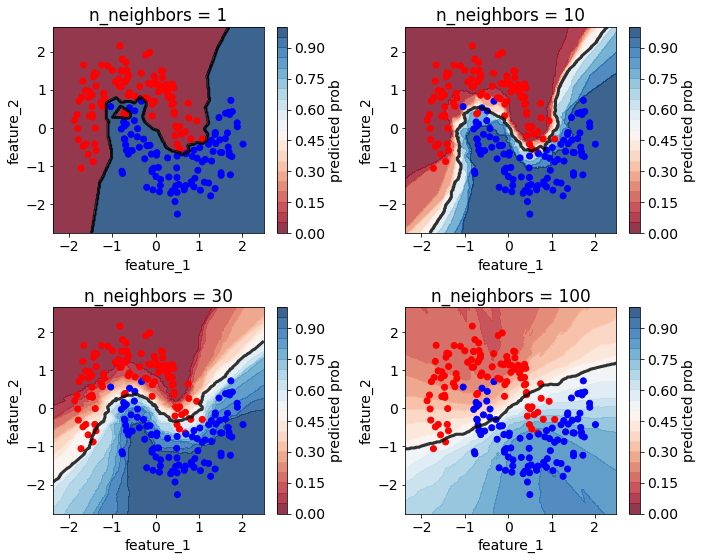

In [6]:
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler

matplotlib.rcParams.update({'font.size': 14})

X = StandardScaler().fit_transform(X)

h = .02  # step size in the mesh

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

plt.figure(figsize=(10,8))
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
cm = plt.cm.RdBu

plt.subplot(2,2,1)
clf = KNeighborsClassifier(n_neighbors = 1)
clf.fit(X,y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('n_neighbors = 1')

plt.subplot(2,2,2)
clf = KNeighborsClassifier(n_neighbors = 10)
clf.fit(X,y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('n_neighbors = 10')

plt.subplot(2,2,3)
clf = KNeighborsClassifier(n_neighbors = 30)
clf.fit(X,y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('n_neighbors = 30')

plt.subplot(2,2,4)
clf = KNeighborsClassifier(n_neighbors = 100)
clf.fit(X,y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('n_neighbors = 100')


plt.tight_layout()

plt.savefig('figures/kneighbors_uni_clf.png',dpi=300)
plt.show()




## KNN notes
- it works best if the number of features is much smaller than the number of points
- it is OK to not try this ML algorithm if the number of features is similar or larger than the number of points
- versatile technique and it can capture complex non-linearities
- the prediction is not a smoothly varying function of the features
- the CPU training time is OK on large datasets
- in regression, outliers are reasonably extrapolated

# Module 2: Support Vector Machines
### Learning objectives of this module:
- Summarize how SVM works
- Describe which hyperparameters need to be tuned and what range the values should have
- Apply the algorithms in regression and classification
- Visualize the predictions of toy datasets
- Summarize under what circumstances a certain algorithm is expected to perform well or poorly and why

## Support Vector Machine
- very versatile technique, it comes in lots of flavors/types, read more about it [here](https://scikit-learn.org/stable/modules/svm.html)
- SVM classifier motivation
   - points in n dimensional space with class 0 and 1
   - we want to find the (n-1) dimensional hyperplane that best separates the points
   - this hyperplane is our (linear) decision boundary
- we cover SVMs with radial basis functions (rbf)
   - we apply a kernel function (a non-linear transformation) to the data points
   - the kernel function basically "smears" the  points
   - gaussian rbf kernel: $\exp(-\gamma (|x - x'|)^2)$ where $\gamma > 0$

## SVR

In [7]:
import numpy as np
np.random.seed(10)
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

n_samples = 30

X = np.random.rand(n_samples)
y = true_fun(X) + np.random.randn(n_samples) * 0.1

X_new = np.linspace(-0.5, 1.5, 2000)


In [8]:
from sklearn.svm import SVR
help(SVR)

Help on class SVR in module sklearn.svm._classes:

class SVR(sklearn.base.RegressorMixin, sklearn.svm._base.BaseLibSVM)
 |  SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
 |  
 |  Epsilon-Support Vector Regression.
 |  
 |  The free parameters in the model are C and epsilon.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to datasets with more than a couple of 10000 samples. For large
 |  datasets consider using :class:`sklearn.svm.LinearSVR` or
 |  :class:`sklearn.linear_model.SGDRegressor` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  Read more in the :ref:`User Guide <svm_regression>`.
 |  
 |  Parameters
 |  ----------
 |  kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}, default='rbf'
 |       Specifies the k

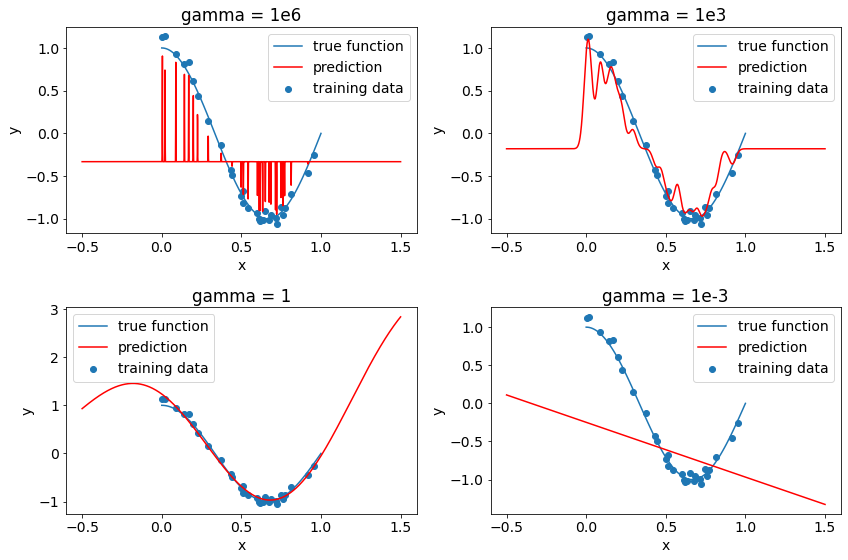

In [9]:
matplotlib.rcParams.update({'font.size': 14})


plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.scatter(X,y,label='training data')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
reg = SVR(gamma = 1000000, C = 100)
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])
plt.plot(X_new,y_new,'r',label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('gamma = 1e6')
plt.legend()

plt.subplot(2,2,2)
plt.scatter(X,y,label='training data')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
reg = SVR(gamma = 1000, C = 100)
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])
plt.plot(X_new,y_new,'r',label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('gamma = 1e3')
plt.legend()

plt.subplot(2,2,3)
plt.scatter(X,y,label='training data')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
reg = SVR(gamma = 1, C = 100)
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])
plt.plot(X_new,y_new,'r',label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('gamma = 1')
plt.legend()


plt.subplot(2,2,4)
plt.scatter(X,y,label='training data')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
reg = SVR(gamma = 0.001, C = 100)
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])
plt.plot(X_new,y_new,'r',label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('gamma = 1e-3')
plt.legend()

plt.tight_layout()
plt.savefig('figures/SVM_reg.png',dpi=300)
plt.show()


## SVC

In [10]:
from sklearn.datasets import make_moons

# create the data
X,y = make_moons(noise=0.2, random_state=1,n_samples=200)


In [11]:
from sklearn.svm import SVC
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`sklearn.svm.LinearSVC` or
 |  :class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  

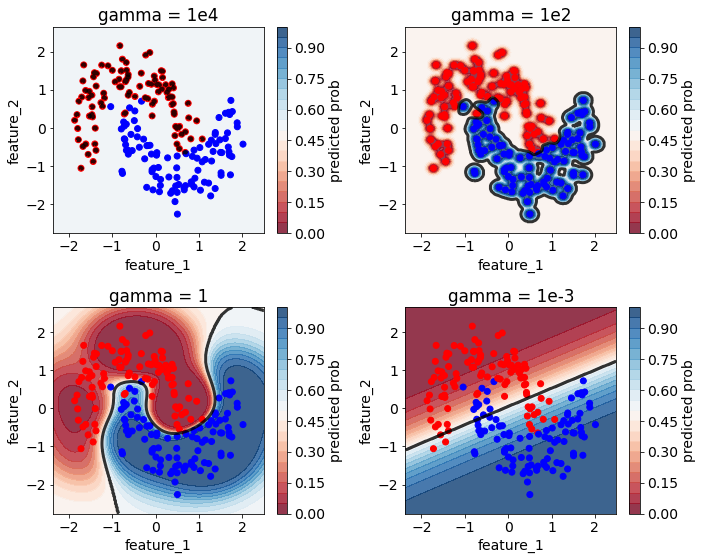

In [12]:
matplotlib.rcParams.update({'font.size': 14})

X = StandardScaler().fit_transform(X)

h = .02  # step size in the mesh

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

plt.figure(figsize=(10,8))
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
cm = plt.cm.RdBu

plt.subplot(2,2,1)
clf = SVC(gamma = 1e4, C = 100, probability=True)
clf.fit(X,y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('gamma = 1e4')

plt.subplot(2,2,2)
clf = SVC(gamma = 1e2, C = 100, probability=True)
clf.fit(X,y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('gamma = 1e2')

plt.subplot(2,2,3)
clf = SVC(gamma = 1e0, C = 100, probability=True)
clf.fit(X,y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('gamma = 1')

plt.subplot(2,2,4)
clf = SVC(gamma = 1e-3, C = 100, probability=True)
clf.fit(X,y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('gamma = 1e-3')


plt.tight_layout()

plt.savefig('figures/SVM_clf.png',dpi=300)
plt.show()




## SVM notes
- explore other kernels too!
- it works best on small to medium-sized datasets
    - the training time increases non-linearly with the number of points
    - one model is trained on one CPU, this technique cannot be parallelized
    - if you dataset has more than 1e5 points, the training time can be hours or days
- very versatile technique with linear and various non-linear kernels
- the prediction is a smoothly varying function of the features
- in regression, outliers might be extrapolated in a wild non-linear fashion
- in classification, model is unsure about outliers

# Module 3: Random Forest
### Learning objectives of this module:
- Summarize how RF works
- Describe which hyperparameters need to be tuned and what range the values should have
- Apply the algorithms in regression and classification
- Visualize the predictions of toy datasets
- Summarize under what circumstances a certain algorithm is expected to perform well or poorly and why

## <center>Decision trees and random forests</center>

- Decision tree: the data is split according to certain features
- Here is an example tree fitted to data:

<center><img src = 'figures/Decision-Trees-modified-1.png' width="500"></center>

<center><img src = 'figures/Decision-Trees-modified-1.png' width="500"></center>

- Trees have nodes and leaves.
- The critical values and features in the nodes are determined automatically by minimizing a cost function.

- Random forest: ensemble of random decision trees
- Each tree sees a random subset of the training data, that's why the forest is random.

<center><img src="figures/tree.png" width="450"></center>



## A decision tree in regression

In [13]:
import numpy as np
np.random.seed(10)
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

n_samples = 30

X = np.random.rand(n_samples)
y = true_fun(X) + np.random.randn(n_samples) * 0.1

X_new = np.linspace(0, 1, 1000)


In [14]:
from sklearn.ensemble import RandomForestRegressor
help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------

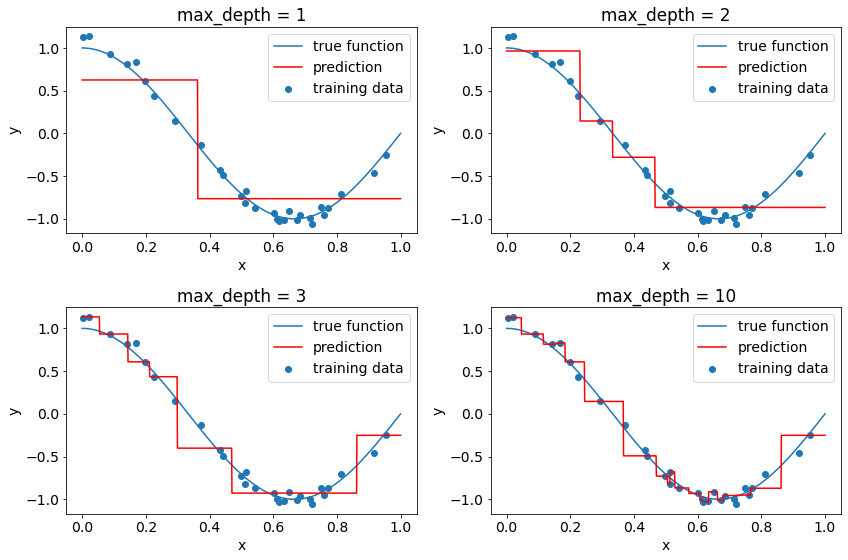

In [15]:
matplotlib.rcParams.update({'font.size': 14})


plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.scatter(X,y,label='training data')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
reg = RandomForestRegressor(n_estimators=1,max_depth=1)
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])
plt.plot(X_new,y_new,'r',label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('max_depth = 1')
plt.legend()

plt.subplot(2,2,2)
plt.scatter(X,y,label='training data')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
reg = RandomForestRegressor(n_estimators=1,max_depth=2)
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])
plt.plot(X_new,y_new,'r',label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('max_depth = 2')
plt.legend()

plt.subplot(2,2,3)
plt.scatter(X,y,label='training data')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
reg = RandomForestRegressor(n_estimators=1,max_depth=3)
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])
plt.plot(X_new,y_new,'r',label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('max_depth = 3')
plt.legend()


plt.subplot(2,2,4)
plt.scatter(X,y,label='training data')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
reg = RandomForestRegressor(n_estimators=1,max_depth=10)
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])
plt.plot(X_new,y_new,'r',label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('max_depth = 10')
plt.legend()

plt.tight_layout()
plt.savefig('figures/tree_reg.png',dpi=300)
plt.show()


## How to avoid overfitting with random forests?
- tune some (or all) of following hyperparameters:
   - max_depth
   - min_samples_split
   - max_features
- With sklearn random forests, **do not tune n_estimators**!
   - the larger this value is, the better the forest will be
   - set n_estimators to maybe a 100 while tuning hyperparameters
   - increase it if necessary once the best hyperparameters are found


## A random forest in classification

In [16]:
from sklearn.datasets import make_moons

# create the data
X,y = make_moons(noise=0.2, random_state=1,n_samples=200)

In [17]:
from sklearn.ensemble import RandomForestClassifier
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  P

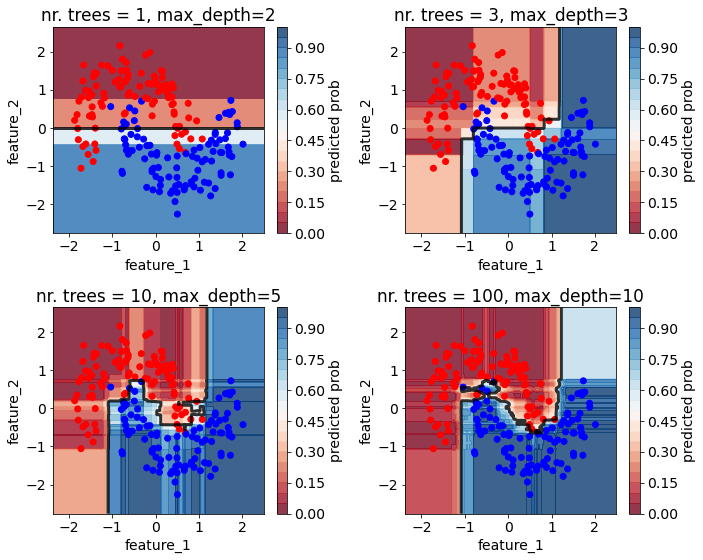

In [18]:
matplotlib.rcParams.update({'font.size': 14})

X = StandardScaler().fit_transform(X)

h = .02  # step size in the mesh

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

plt.figure(figsize=(10,8))
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
cm = plt.cm.RdBu

plt.subplot(2,2,1)
clf = RandomForestClassifier(n_estimators=1,max_depth=2,random_state=1)

clf.fit(X,y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('nr. trees = 1, max_depth=2')

plt.subplot(2,2,2)
clf = RandomForestClassifier(n_estimators=3,max_depth=3,random_state=4)
clf.fit(X,y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('nr. trees = 3, max_depth=3')

plt.subplot(2,2,3)
clf = RandomForestClassifier(n_estimators=10,max_depth=5,random_state=3)
clf.fit(X,y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('nr. trees = 10, max_depth=5')

plt.subplot(2,2,4)
clf = RandomForestClassifier(n_estimators=100,max_depth=10,random_state=3)
clf.fit(X,y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('nr. trees = 100, max_depth=10')


plt.tight_layout()

plt.savefig('figures/forest_clf.png',dpi=300)
plt.show()




## RF notes
- RF is a very robust algorithm
    - decent performance on pretty much any dataset
- RF is great for any dataset size
    - it is very easy to parallelize the model training
    - check out the n_jobs argument of the functions
- it can capture non-linearities, feature correlations
- the prediction is not a smoothly varying function of the features
- behaves well wrt outliers

# Module 4: XGBoost
### Learning objectives of this module:
- Summarize how XGB works
- Describe which hyperparameters need to be tuned and what range the values should have
- Apply the algorithms in regression and classification
- Visualize the predictions of toy datasets
- Summarize under what circumstances a certain algorithm is expected to perform well or poorly and why

## XGBoost
- eXtreme Gradient Boosting - a popular tree-based method
- [blog post](https://xgboost.readthedocs.io/en/latest/tutorials/model.html) and [paper](http://delivery.acm.org/10.1145/2940000/2939785/p785-chen.pdf)
- more advanced than random forest
   - trees are not independent
      - the next tree is built to improve the previous tree
      - less trees are necessary to achieve same accuracy
      - but XGBoost trees can overfit - more on this later
   - handles missing values well
   - it has l1 and l2 regularization while random forest does not

## XGB hyperparameters to tune
- reg_alpha, reg_lambda: the two regularization parameter
- max_depth: same as in a RF
- colsample_bytree:
- subsample:
- do not tune n_estimators, instead use early stopping

In [ ]:
# this code is just illustration
import xgboost
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

param_grid = {"learning_rate": [0.03],
              "n_estimators": [10000],
              "seed": [0],
              #"reg_alpha": [0e0, 1e-2, 1e-1, 1e0, 1e1, 1e2],
              #"reg_lambda": [0e0, 1e-2, 1e-1, 1e0, 1e1, 1e2],
              "missing": [np.nan], 
              #"max_depth": [1,3,10,30,100],
              "colsample_bytree": [0.9],              
              "subsample": [0.66]}

XGB = xgboost.XGBRegressor()
XGB.set_params(**ParameterGrid(param_grid)[0])
XGB.fit(X_train,y_train,early_stopping_rounds=50,eval_set=[(X_CV, y_CV)], verbose=False)
y_CV_pred = XGB.predict(X_CV)
print('the CV RMSE:',np.sqrt(mean_squared_error(y_CV,y_CV_pred)))
y_test_pred = XGB.predict(X_test)
print('the test RMSE:',np.sqrt(mean_squared_error(y_test,y_test_pred)))
print('the test R2:',r2_score(y_test,y_test_pred))

## XGBRegressor

In [19]:
import numpy as np
np.random.seed(10)
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

n_samples = 30

X = np.random.rand(n_samples)
y = true_fun(X) + np.random.randn(n_samples) * 0.1

X_new = np.linspace(0, 1, 1000)


In [25]:
from xgboost import XGBRegressor
help(XGBRegressor)

Help on class XGBRegressor in module xgboost.sklearn:

class XGBRegressor(XGBModel, sklearn.base.RegressorMixin)
 |  XGBRegressor(objective='reg:squarederror', **kwargs)
 |  
 |  Implementation of the scikit-learn API for XGBoost regression.
 |  
 |  
 |  Parameters
 |  ----------
 |  
 |      n_estimators : int
 |          Number of gradient boosted trees.  Equivalent to number of boosting
 |          rounds.
 |  
 |      max_depth : int
 |          Maximum tree depth for base learners.
 |      learning_rate : float
 |          Boosting learning rate (xgb's "eta")
 |      verbosity : int
 |          The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
 |      objective : string or callable
 |          Specify the learning task and the corresponding learning objective or
 |          a custom objective function to be used (see note below).
 |      booster: string
 |          Specify which booster to use: gbtree, gblinear or dart.
 |      tree_method: string
 |          Spec

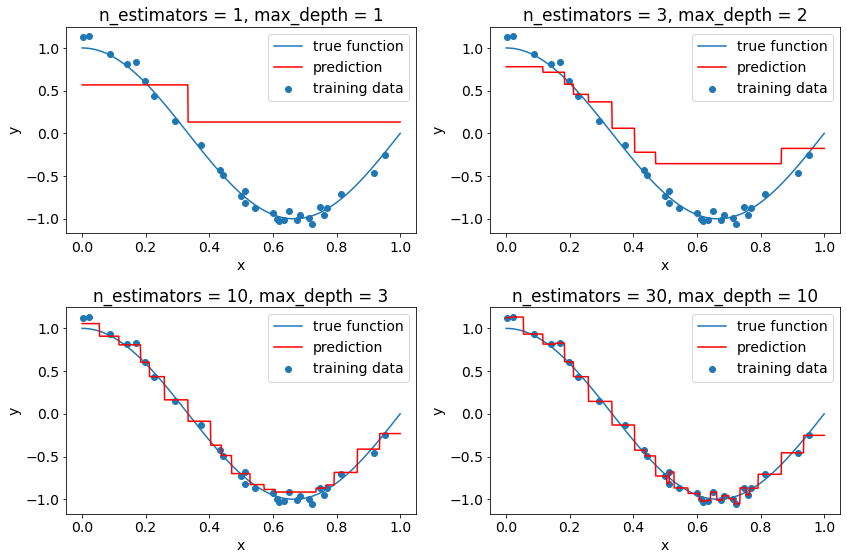

In [24]:
matplotlib.rcParams.update({'font.size': 14})


plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.scatter(X,y,label='training data')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
reg = XGBRegressor(n_estimators=1,max_depth=1)
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])
plt.plot(X_new,y_new,'r',label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('n_estimators = 1, max_depth = 1')
plt.legend()

plt.subplot(2,2,2)
plt.scatter(X,y,label='training data')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
reg = XGBRegressor(n_estimators=3,max_depth=2)
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])
plt.plot(X_new,y_new,'r',label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('n_estimators = 3, max_depth = 2')
plt.legend()

plt.subplot(2,2,3)
plt.scatter(X,y,label='training data')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
reg = XGBRegressor(n_estimators=10,max_depth=3)
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])
plt.plot(X_new,y_new,'r',label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('n_estimators = 10, max_depth = 3')
plt.legend()


plt.subplot(2,2,4)
plt.scatter(X,y,label='training data')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
reg = XGBRegressor(n_estimators=30,max_depth=10)
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])
plt.plot(X_new,y_new,'r',label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('n_estimators = 30, max_depth = 10')
plt.legend()

plt.tight_layout()
plt.savefig('figures/XGB_reg.png',dpi=300)
plt.show()


## XGBClassifier

In [26]:
from sklearn.datasets import make_moons

# create the data
X,y = make_moons(noise=0.2, random_state=1,n_samples=200)

In [27]:
from xgboost import XGBClassifier
help(XGBClassifier)


Help on class XGBClassifier in module xgboost.sklearn:

class XGBClassifier(XGBModel, sklearn.base.ClassifierMixin)
 |  XGBClassifier(objective='binary:logistic', **kwargs)
 |  
 |  Implementation of the scikit-learn API for XGBoost classification.
 |  
 |  
 |  Parameters
 |  ----------
 |  
 |      max_depth : int
 |          Maximum tree depth for base learners.
 |      learning_rate : float
 |          Boosting learning rate (xgb's "eta")
 |      verbosity : int
 |          The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
 |      objective : string or callable
 |          Specify the learning task and the corresponding learning objective or
 |          a custom objective function to be used (see note below).
 |      booster: string
 |          Specify which booster to use: gbtree, gblinear or dart.
 |      tree_method: string
 |          Specify which tree method to use.  Default to auto.  If this parameter
 |          is set to default, XGBoost will choose the mos

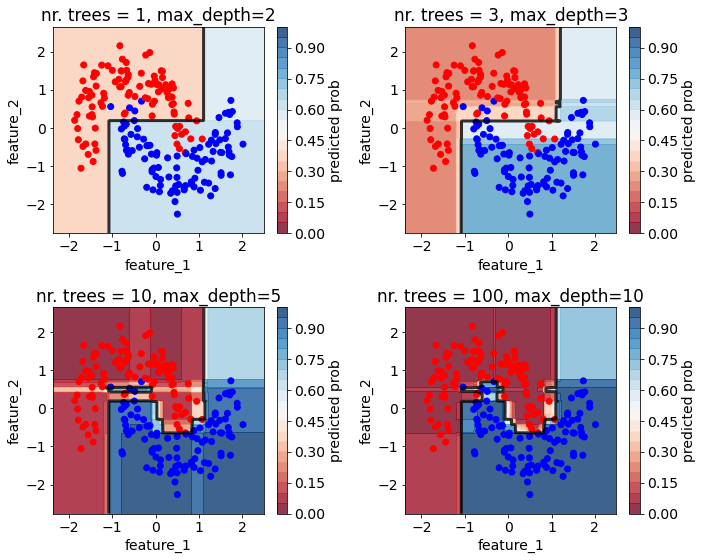

In [28]:
matplotlib.rcParams.update({'font.size': 14})

X = StandardScaler().fit_transform(X)

h = .02  # step size in the mesh

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

plt.figure(figsize=(10,8))
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
cm = plt.cm.RdBu

plt.subplot(2,2,1)
clf = XGBClassifier(n_estimators=1,max_depth=2,random_state=1)

clf.fit(X,y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('nr. trees = 1, max_depth=2')

plt.subplot(2,2,2)
clf = XGBClassifier(n_estimators=3,max_depth=3,random_state=4)
clf.fit(X,y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('nr. trees = 3, max_depth=3')

plt.subplot(2,2,3)
clf = XGBClassifier(n_estimators=10,max_depth=5,random_state=3)
clf.fit(X,y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('nr. trees = 10, max_depth=5')

plt.subplot(2,2,4)
clf = XGBClassifier(n_estimators=100,max_depth=10,random_state=3)
clf.fit(X,y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('nr. trees = 100, max_depth=10')


plt.tight_layout()

plt.savefig('figures/XGB_clf.png',dpi=300)
plt.show()




## XGB notes
- XGB is not easy to use, it has many hyper-parameters, but it is a powerful technique
- good on any dataset size, it can train a model on multiple cores
- it works if you have missing values! See part 5 of the course series
- it can capture non-linearities, feature correlations
- the prediction is not a smoothly varying function of the features
- behaves well wrt outliers